<a href="https://colab.research.google.com/github/gachet/000mis-colabs/blob/master/capacitor_soluc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ajuste de curvas por mínimos cuadrados. Lab. 2

#### El fichero capacitor.dat contiene datos de tiempo y tensión de descarga de un capacitor.  Se asume que ambas variables se relacionan de forma exponencial mediante la ecuación 
$$Tensión =  c_{1}*e^{c_{2}*tiempo}$$
#### Codificar el programa correspondiente para leer los datos del fichero, hacer un ajuste por mínimos  cuadrados (calcular $c_{1} $ y $c_{2} $) mediante:

1. El sistema de ECUACIONES LINEALES.
2. Mediante las ECUACIONES NORMALES 
3. Cañcular el sumatorio de los errores cuadráticos
3. Calcular el Coeficiente de Determinación en ambas soluciones. 
4. Comprobar que ambos resultados coinciden. 
5. Dibujar los datos así como la recta de regresión.
6. Dibujar también los residuos. Utilizar funviones de numpy.

### El sistema de dos ecuaciones para una función lineal $F(x) = \alpha*x+\beta$ en forma matricial se puede escribir :  $Ax=B$

$$
\begin{bmatrix}
\displaystyle \sum_{i=1}^{m}x_{i}^{2}& \displaystyle\sum_{i=1}^{m}x_{i} \\ 
\displaystyle\sum_{i=1}^{m}x_{i} & m
\end{bmatrix}
\begin{bmatrix}
\alpha\\ 
\beta
\end{bmatrix} =\begin{bmatrix}
\displaystyle\sum_{i=1}^{m}x_{i}y_{i}\\ 
\displaystyle\sum_{i=1}^{m}y_{i}
\end{bmatrix}
$$

### Siedo las incógnitas  los coeficientes que buscamos:  $\alpha$ y $\beta$

### Si tenemos una función exponencial de la forma $$ F(x)=y =  c_{1}e^{c_{2}x}$$

Podemos linealizarla a una ecuación de la forma $F(x) = v = c_{2}*x+\beta$

Siendo &nbsp;&nbsp;&nbsp; $v = \ln(y) \: \:\:\:\:\beta = \ln(c_{1})$

El sistema de ecuaciones lineales sería

$$
\begin{bmatrix}
\displaystyle \sum_{i=1}^{m}x_{i}^{2}& \displaystyle\sum_{i=1}^{m}x_{i} \\ 
\displaystyle\sum_{i=1}^{m}x_{i} & m
\end{bmatrix}
\begin{bmatrix}
c_{2}\\ 
\ln (c_{1})
\end{bmatrix} =\begin{bmatrix}
\displaystyle\sum_{i=1}^{m}x_{i}\ln (y_{i})\\ 
\displaystyle\sum_{i=1}^{m}\ln (y_{i})
\end{bmatrix}
$$

### SISTEMA DE ECUACIONES LINEALES

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# input data from file - which needs to be in same directory
input_data=np.loadtxt('capacitor.dat',skiprows=1)
x_orig =input_data[:,0]
y_orig =input_data[:,1]
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
print('datos leidos ',len(x),' puntos \n')
print('Tiempo (Seg) \t Tensión de descarga (volts)')
for i in range(0,len(x)):
    print('%4.1f\t\t'%(x[i]),'%4.3f'%(y[i]))

datos leidos  16  puntos 

Tiempo (Seg) 	 Tensión de descarga (volts)
 0.0		 5.000
 0.0		 4.094
 0.0		 3.352
 0.1		 2.744
 0.1		 2.247
 0.1		 1.839
 0.1		 1.506
 0.1		 1.233
 0.2		 1.009
 0.2		 0.826
 0.2		 0.677
 0.2		 0.554
 0.2		 0.454
 0.3		 0.371
 0.3		 0.304
 0.3		 0.249


In [0]:
suma_x_cuad = np.sum(x*x)
suma_x = np.sum(x)
suma_xy = np.sum(x*np.log(y))
suma_y = np.sum(np.log(y))
m= len(x)

In [0]:
A = np.array([[suma_x_cuad, suma_x],
            [suma_x,m]])
print('Matriz A es\n',A)

Matriz A es
 [[ 0.496  2.4  ]
 [ 2.4   16.   ]]


In [0]:
#B0 = np.array([sum_xy(x1,y1),sum_y(y1)])
B =  np.array([suma_xy,suma_y]).reshape(-1,1)
print('el vector B es \n',B)

el vector B es 
 [[-1.09734137]
 [ 1.75102986]]


In [0]:
coef = np.dot(np.linalg.inv(A),B)
print(' alfa y beta de la ecuación lineal son',coef[0],coef[1])
c2 = coef[0]
c1 =  np.e**coef[1]
print('Los coeficientes c1 y c2 para la ecuación exponencial son  \n', c1,c2)

 alfa y beta de la ecuación lineal son [-9.99996944] [1.60943478]
Los coeficientes c1 y c2 para la ecuación exponencial son  
 [4.99998435] [-9.99996944]


#### la ecuación encontrada es $y  =  5e^{-10x}$

In [0]:
## y calculados (tensión en el condensador)
y_calc = c1*np.e **(c2*x)


In [0]:
suma_errores_cuad = np.sum((y-y_calc)**2)
print ('suma_errores_cuadráticos ', suma_errores_cuad)

suma_errores_cuadráticos  5.003228860233066e-10


### Como medida de la bondad del ajuste utilizamos el coeficiente de determinación definido por:
$$
R^{2}=\frac{\displaystyle\sum_{i=1}^{m}\left(\hat{y_{i}}-\bar{y}\right)^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

#### Siendo :
&nbsp; &nbsp; &nbsp;$\hat{y_{i}}$ &nbsp; &nbsp; &nbsp;&nbsp; valor calculado de  $y_{i}$ <br>
&nbsp; &nbsp; &nbsp;$\bar{y}$&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;media de los valores observados $y_{i}$<br>
&nbsp; &nbsp; &nbsp;$y_{i}$&nbsp; &nbsp; &nbsp; &nbsp; valores observados de  y


## Debemos utilizar la forma de la ecuación LINEALIZADA

In [0]:
alfa = coef[0]
beta = coef[1]
v=np.log(y)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9999999999729338


### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1-\frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

siendo el vector $ r = \displaystyle\sum_{i=1}^{m}\left(\hat y_{i}-\bar{y}\right)^{2}$

## Igualmente Debemos utilizar la forma de la ecuación LINEALIZADA

In [0]:
v_calc= alfa*x+beta
r = (v - v_calc)
R2=1 - (np.linalg.norm(r)**2 / np.sum((v - np.mean(v)) ** 2))
print(R2)

0.9999999999729337


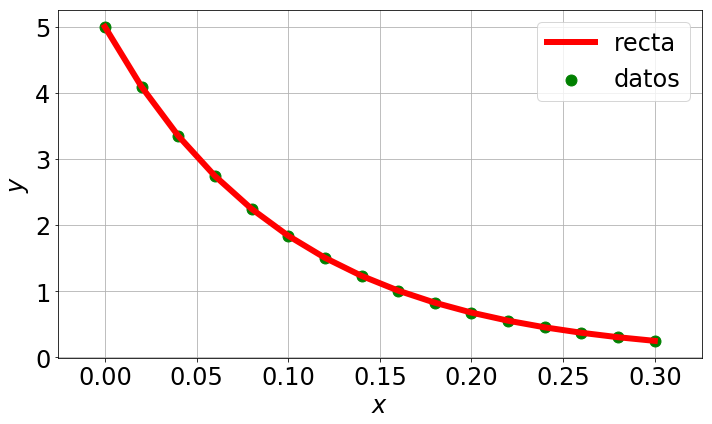

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='recta',zorder=4)
plt.xlabel('$x$',fontsize=24)
plt.ylabel('$y$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()


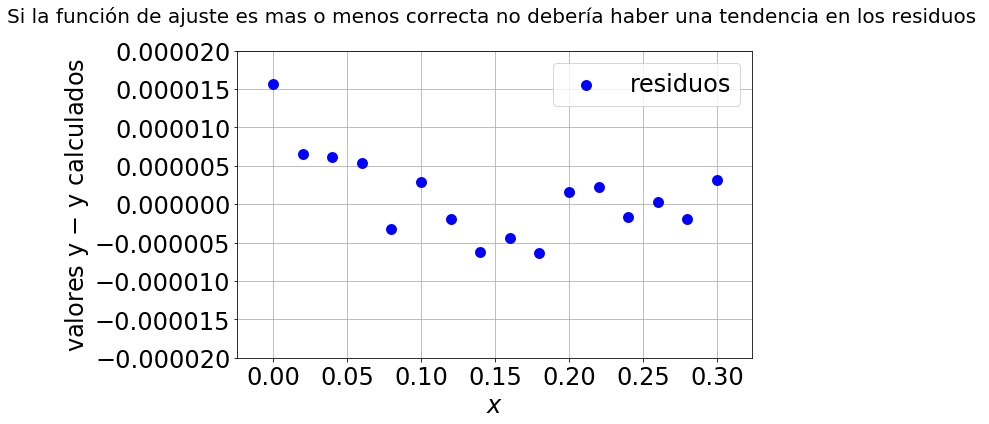

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
bottom, top = -0.00002,0.00002  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
errores = y-y_calc
plt.scatter(x,errores,s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$x$',fontsize=24)
plt.ylabel('valores y $-$ y calculados',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### Solución mediante las ecuaciones NORMALES


$$
\begin{bmatrix}
x_{1}& 1 \\ 
x_{2}& 1  \\
x_{3}& 1 \\
\cdot & \cdot \\
\cdot & \cdot \\
x_{m} & 1
\end{bmatrix}
\begin{bmatrix}
\alpha\\ 
\beta
\end{bmatrix} =\begin{bmatrix}
y_{1}\\
y_{2}\\
y_{3} \\
\cdot \\
\cdot \\
y_{m}
\end{bmatrix}
$$

El sistema matricial se puede escribir como $Ac = y$ que no se puede resolver por Gauss por ser sobredeterminado. Aplicando el criterio de mínimos cuadrados llegamos a la ecuación matricial

$$\left ( A^{T}A \right )c=A^{T}y$$

### Si tenemos una función exponencial de la forma 
$$ F(x)=y =  c_{1}e^{c_{2}x}$$

Podemos linealizarla a una ecuación de la forma $F(x) = v = \alpha*x+\beta$

Siendo $v = \ln y \: \:\:\alpha = c_{2}\:\:\beta = \ln c_{1}$

In [0]:
A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[0.   1.  ]
 [0.02 1.  ]
 [0.04 1.  ]
 [0.06 1.  ]
 [0.08 1.  ]
 [0.1  1.  ]
 [0.12 1.  ]
 [0.14 1.  ]
 [0.16 1.  ]
 [0.18 1.  ]
 [0.2  1.  ]
 [0.22 1.  ]
 [0.24 1.  ]
 [0.26 1.  ]
 [0.28 1.  ]
 [0.3  1.  ]]


In [0]:
v=np.log(y)
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [-9.99996944] [1.60943478]
Coeficientes  c1 y c2 son  
 [4.99998435] [-9.99996944]


#### la ecuación encontrada es $y  =  5e^{-10x}$

### Como medida de la bondad del ajuste utilizamos el coeficiente de determinación definido por:
$$
R^{2}=\frac{\displaystyle\sum_{i=1}^{m}\left(\hat{y_{i}}-\bar{y}\right)^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

#### Siendo :
&nbsp; &nbsp; &nbsp;$\hat{y_{i}}$ &nbsp; &nbsp; &nbsp;&nbsp; valor calculado de  $y_{i}$ <br>
&nbsp; &nbsp; &nbsp;$\bar{y}$&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;media de los valores observados $y_{i}$<br>
&nbsp; &nbsp; &nbsp;$y_{i}$&nbsp; &nbsp; &nbsp; &nbsp; valores observados de  y


## Debemos utilizar la forma de la ecuación LINEALIZADA

In [0]:
alfa = c[0]
beta = c[1]
v=np.log(y)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.999999999972934


### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1-\frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

siendo el vector $ r = \displaystyle\sum_{i=1}^{m}\left(\hat y_{i}-\bar{y}\right)^{2}$

## Igualmente Debemos utilizar la forma de la ecuación LINEALIZADA

In [0]:
r = v - np.dot(A,c)
R2=1. - (np.linalg.norm(r)**2 / np.sum((v - np.mean(v)) ** 2))
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9999999999729337


In [0]:
y_calc = c1*np.e**(c2*x)

In [0]:
suma_errores_cuad = np.sum((y-y_calc)**2)
suma_errores_cuad

5.003228858595793e-10

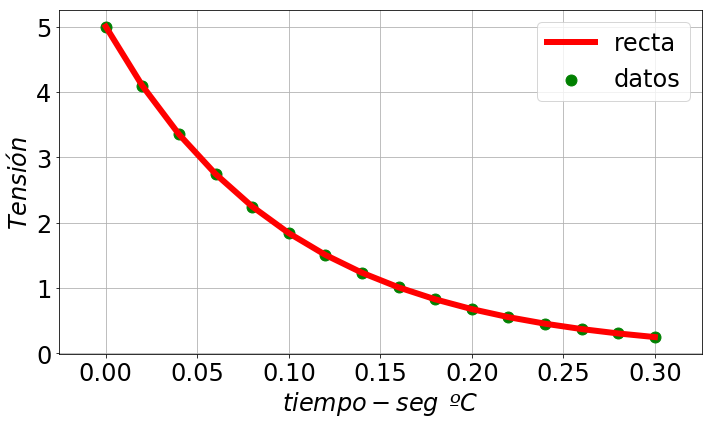

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='recta',zorder=4)
plt.xlabel('$tiempo-seg \: \:  ºC$',fontsize=24)
plt.ylabel('$Tensión$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()


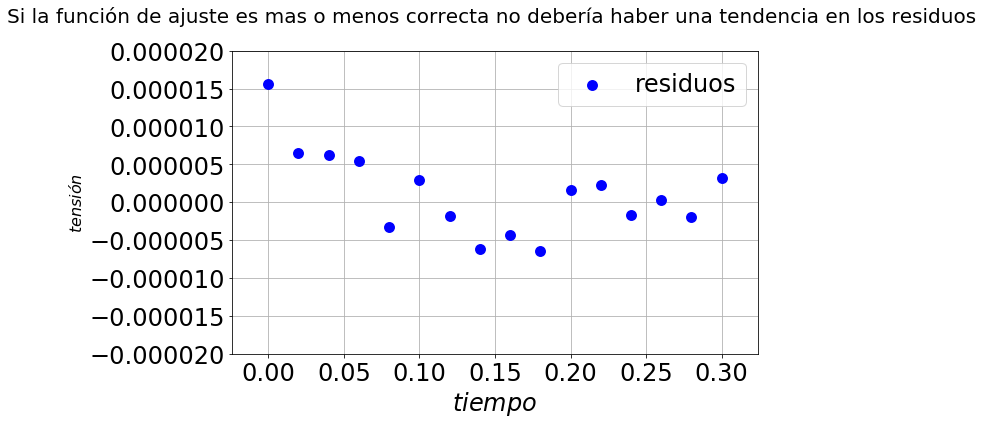

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
bottom, top = -0.00002,0.00002  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,(y-y_calc),s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$tiempo$',fontsize=24)
plt.ylabel('$tensión$',fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()